In [1]:
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter
import re
import matplotlib.pyplot as plt


In [2]:
# excel formatından csv formatına çevirme ve dosya oalrak kaydetme
data = pd.read_excel("Görüntüleme Merkezleri-Deneme.xlsx",header=None)
data.rename(columns={0: 'text'}, inplace=True)
data.to_csv("csv_dosyasi.csv", index=False) 

In [3]:
#csv formatındaki dosyayı okuma
data = pd.read_csv("csv_dosyasi.csv")
data

,text
0,Negatif anahtar kelime
1,[bt raporu ne zaman çıkar]
2,"""çapa tomografi sonuçları"""
3,[bt dinamik anjiyografi abdominal aorta]
4,[body 32 ne demek]
...,...
1940,denizli
1941,konya
1942,mersin
1943,kayseri


In [4]:
len(data)

1945

In [5]:
data["text"][0]

'Negatif anahtar kelime'

In [6]:
# Tüm ifadeleri bir stringe atama. (Daha sonra veri temizleme işlemi yapmak için gereksiz karakterler  belirlenip silinecek)
all_words = ""
for value in data["text"]:
    value = value.split()
    for words in value:
        all_words = all_words +" " +words

In [7]:
#Tüm kelimeler
all_words

' Negatif anahtar kelime [bt raporu ne zaman çıkar] "çapa tomografi sonuçları" [bt dinamik anjiyografi abdominal aorta] [body 32 ne demek] [tomografi yan etkileri] [tomografi kontrast madde] [tomografi kaç günde bir çekilir] [tomografi helical ne demek] [tomografi ilacı isimleri] [meme mr durum kodu 110 ne demek] [medicana mr cihazı] [kas yırtılması tomografide belli olur mu] [toraks bt rapor örnekleri] [kranial mrg nedir] [koroner bt anjiyo ne demek] [kontrastlı bt kontrendikasyonları] [el mr nasıl çekilir] [bt anjiyografi akciğer] [koroner bt anjiyografi 256] [göz tomografisi neden istenir] [dual scano ne demek] [bilgisayarlı tomografi kaç dk sürer] [temiz beyin tomografisi] [mr defekografi hazırlık] [ilaçlı kulak mr kaç dk sürer] [mr 3 tesla nedir] [ebrandevu] [tomografi rapor sonucu] [helical kaç olmalı] [emarda kaç dakika durulur] [özelde mr sonucu kaç günde çıkar] [gögüs emarı nasıl çekilir] [burun tomografisi neden çekilir] [bt kontrastlı] "urla devlet hastanesi mhrs randevu alm

Alfabatik karakter dışındaki noktalama işaretleri, sayılar ve köşeli parantezler silinecek

In [8]:
#data da kullanılan tüm karakterler
set(all_words)

{' ',
 '"',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'N',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'ç',
 'ö',
 'ü',
 'ğ',
 'ı',
 'ş'}

In [9]:
#Gereksiz karakterleri silme
for index in range(0,len(data)):
    data["text"][index] = data["text"][index].replace("[","").replace("]","") #Köşeli parantez karakterlerini silme
    data["text"][index] = re.sub(r"\d", "",data["text"][index]) #rakamları silme)
    data["text"][index] = re.sub(r"[^\w\s]", "",data["text"][index]) #Noktalama işaretlerini silme
    data["text"][index] =data["text"][index].lower() #küçük harfe çevirme

In [10]:
data

,text
0,negatif anahtar kelime
1,bt raporu ne zaman çıkar
2,çapa tomografi sonuçları
3,bt dinamik anjiyografi abdominal aorta
4,body ne demek
...,...
1940,denizli
1941,konya
1942,mersin
1943,kayseri


In [11]:
#bigrams : Verileri 2'şerli ayırır
def to_bigrams_and_frequency(text):
    """
        text: bigrams ve frekansına çevirilecek veri
        bigram_freq : Fonksiyon return olak girdi olarak verilen text verisini bigram ve frekanslarına çevirir
    """
    tokens = nltk.word_tokenize(text)
    bigrams = list(ngrams(tokens, 2))
    bigram_freq = Counter(bigrams)
    return bigram_freq
    

In [12]:
bigrams_and_frekans=Counter()
for text in data["text"]:
    bigrams_and_frekans.update(to_bigrams_and_frequency(text))

In [13]:
bigrams_and_frekans

Counter({('nasıl', 'çekilir'): 211,
         ('ne', 'demek'): 81,
         ('mr', 'nasıl'): 67,
         ('ne', 'kadar'): 62,
         ('kadar', 'sürer'): 42,
         ('ilaçlı', 'tomografi'): 42,
         ('neden', 'çekilir'): 40,
         ('beyin', 'mr'): 40,
         ('kaç', 'günde'): 38,
         ('emarı', 'nasıl'): 36,
         ('tomografi', 'nasıl'): 35,
         ('günde', 'çıkar'): 34,
         ('ne', 'zaman'): 33,
         ('bt', 'anjiyografi'): 32,
         ('tomografi', 'sonucu'): 32,
         ('açık', 'emar'): 31,
         ('mr', 'sonucu'): 30,
         ('mr', 'ne'): 29,
         ('zaman', 'çıkar'): 28,
         ('bt', 'nedir'): 28,
         ('mr', 'nedir'): 26,
         ('nasıl', 'yapılır'): 26,
         ('tomografi', 'nedir'): 26,
         ('bilgisayarlı', 'tomografi'): 25,
         ('görüntüleme', 'merkezi'): 25,
         ('mr', 'cihazı'): 24,
         ('sonucu', 'ne'): 24,
         ('bt', 'anjiyo'): 23,
         ('sonucu', 'kaç'): 23,
         ('tomografisi', 'nasıl'): 2

In [14]:
# En yüksek 10 frekanslı bi-gramları alma
en_yuksek_bigrams = bigrams_and_frekans.most_common(10)

In [15]:
# Bi-gramların ve frekanslarının ayrılması
bigrams = [bigram[0] for bigram in en_yuksek_bigrams]
frekans = [bigram[1] for bigram in en_yuksek_bigrams]

In [16]:
#Tuple olarak tutulan verileri string ile birleştirme
bigram_strings = [' '.join(bigram) for bigram in bigrams]

In [17]:
bigram_strings

['nasıl çekilir',
 'ne demek',
 'mr nasıl',
 'ne kadar',
 'kadar sürer',
 'ilaçlı tomografi',
 'neden çekilir',
 'beyin mr',
 'kaç günde',
 'emarı nasıl']

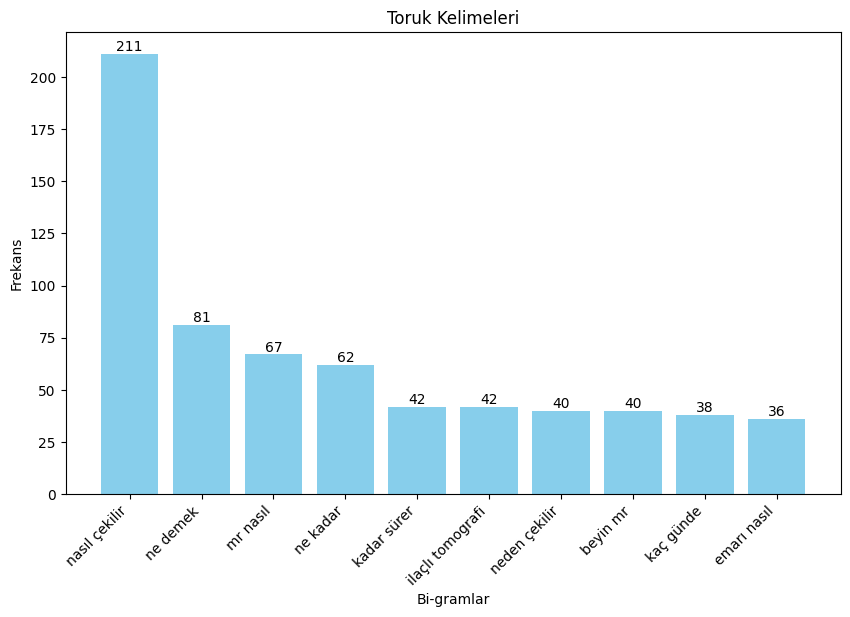

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(bigram_strings, frekans, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bi-gramlar')
plt.ylabel('Frekans')
plt.title('Toruk Kelimeleri')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.show()